In [11]:
import numpy as np
import matplotlib.pyplot as plt

def goe_eigs(N = 10):
    # Grand orthogonal ensemble: Hamiltonians with time reversal symmetry
    A = np.random.randn(N, N)
    B = 2**-0.5 * (A + A.T)
    D = np.linalg.eigvals(B)  
    return np.real(D)

def gue_eigs(N = 10):
    # Grand unified ensemble: Hamiltonians without time reversal symmetry
    A = np.random.randn(N, N) + 1j * np.random.randn(N, N) 
    B = 2**-1 * (A + np.conj(A.T)) 
    D = np.linalg.eigvals(B)  
    return np.real(D)

def bernoulli_eigs(N = 10):
    # Bernoulli ensemble
    B = np.zeros([N, N])
    for i in range(N):
        for j in range(N):
            if i >= j & i != j:
                x = np.random.random()
                if x <= 0.5:
                    B[i][j] = 1
                    B[j][i] = 1
                else:
                    B[i][j] = -1
                    B[j][i] = -1
    D = np.linalg.eigvals(B) 
    return np.real(D)

def random_matrix_histogram(fun = goe_eigs, N = 10, n_matrices = 1000):
    """
    fun: random matrix function
    N: random matrix size
    n_matrices: number of random matrices to use
    """
    eig = np.zeros([n_matrices, N]) 
    for i in range(n_matrices):
        eig[i, :] = fun(N) 
    eig = eig / np.sqrt(N) # Don't forget to normalize the eigenvalues!

    # Obtain eigenvalue spacing:
    spacing = np.diff(np.sort(eig)) # diff and sort operates row-wise by default
    spacing = spacing / np.mean(spacing) # np.mean operates over all matrix elements

    # Wigner Semi Circle
    R = 2
    x = np.linspace(-R, R, 1000)
    pw = 2 / (R**2 * np.pi) * np.sqrt(R**2 - x**2)

    # Wigner Surmise
    s = np.linspace(0, 3, 1000)
    fw = np.pi * s / 2 * np.exp(-np.pi * s**2 / 4)  
    # For the GUE ensemble, the following Surmise should be used instead:
    # c.f. Wigner surmise for mixed symmetry classes in random matrix theory
    # Sebastian Schierenberg, Falk Bruckmann, and Tilo Wettig
    # fw = 32 / np.pi**2 * delta**2 * np.exp(-4 / np.pi * delta**2)

    plt.figure(figsize = (10, 5))
    plt.subplot(2, 1, 1) 
    plt.hist(eig.ravel(), 100, density = True)
    plt.plot(x, pw)
    plt.grid(True)
    plt.subplot(2, 1, 2)
    plt.hist(spacing.ravel(), 100, density = True)
    plt.plot(s, fw)
    plt.ylim([0, 1])
    plt.xlim([0, 5])
    plt.grid(True)
    plt.show()

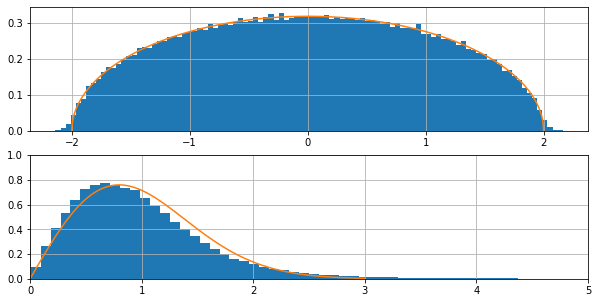

In [12]:
random_matrix_histogram(fun = goe_eigs, n_matrices = 1000, N = 100)

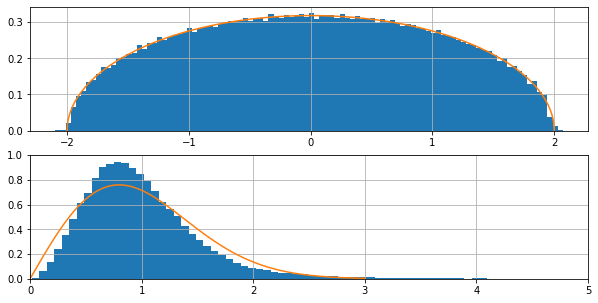

In [13]:
random_matrix_histogram(fun = gue_eigs, n_matrices = 1000, N = 100)

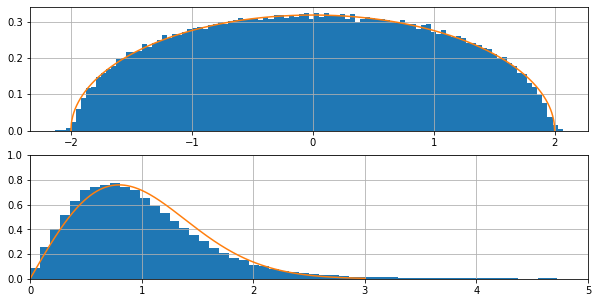

In [14]:
random_matrix_histogram(fun = bernoulli_eigs, n_matrices = 1000, N = 100)